In [1]:
##############################################################################################################################
## The Objective of this project is to provide a machine learning tool to predict risk of hearfailure based on 
## lifestyle and existing health information
## We will analyse a public dataset provide by IBM case use to train our model
## We'll analyse and modify the data for better performances 
## And we'll use a classifier selector to identify the best classifier for the project
## We finally will provide the results of the chosen classifier
##############################################################################################################################

In [2]:
##############################################################################################################################
## First we import the necessary librairies
##############################################################################################################################

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score



C:\Users\mehdi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
##############################################################################################################################
## We then import the dataset from our local location
##############################################################################################################################

In [5]:
patient_df = pd.read_csv('patientdataV6.csv')

In [6]:
##############################################################################################################################
## Let's have a look at our data
##############################################################################################################################

In [7]:
patient_df.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


In [8]:
patient_df.describe()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,87.115093,20.423148,195.080278,26.359722,49.965185,119.729537
std,19.744375,12.165320,26.136732,3.820147,13.079281,71.147060
min,48.000000,0.000000,150.000000,20.000000,28.000000,0.000000
25%,72.000000,10.000000,173.000000,23.000000,39.000000,58.000000
50%,85.000000,20.000000,196.000000,26.000000,50.000000,119.000000
75%,100.000000,31.000000,217.000000,30.000000,61.000000,180.000000
max,161.000000,45.000000,245.000000,34.000000,72.000000,250.000000


In [9]:
##############################################################################################################################
## Visualize the distribution of the output which is the patient having or not a heartfailure
##############################################################################################################################

In [ ]:
import pylab as pl

a = pl.subplot(1,1,1)
a.hist(patient_df['HEARTFAILURE'], 2, align = 'mid', rwidth=0.5 )
a.set_xticks([0,1])
a.set_ylabel('Number of Patients')

In [10]:
##############################################################################################################################
## More info regarding our data types to prepare the preprocessing of our data
##############################################################################################################################

In [11]:
print("Data Types for 'FamilyHistory':", patient_df['FAMILYHISTORY'].unique())
print("Data Types for 'HeartFailure':", patient_df['HEARTFAILURE'].unique())
print("Data Types for 'Sex':", patient_df['SEX'].unique())
print("Data Types for 'SmokerLast5Years':", patient_df['SMOKERLAST5YRS'].unique())
print("Data Types for 'HEARTFAILURE':", patient_df['HEARTFAILURE'].unique())

Data Types for 'FamilyHistory': ['N' 'Y']
Data Types for 'HeartFailure': ['N' 'Y']
Data Types for 'Sex': ['F' 'M']
Data Types for 'SmokerLast5Years': ['N' 'Y']
Data Types for 'HEARTFAILURE': ['N' 'Y']


In [12]:
##############################################################################################################################
## To get a first feel on our data, let's see the kind of correlation that exists in our dataset
##############################################################################################################################

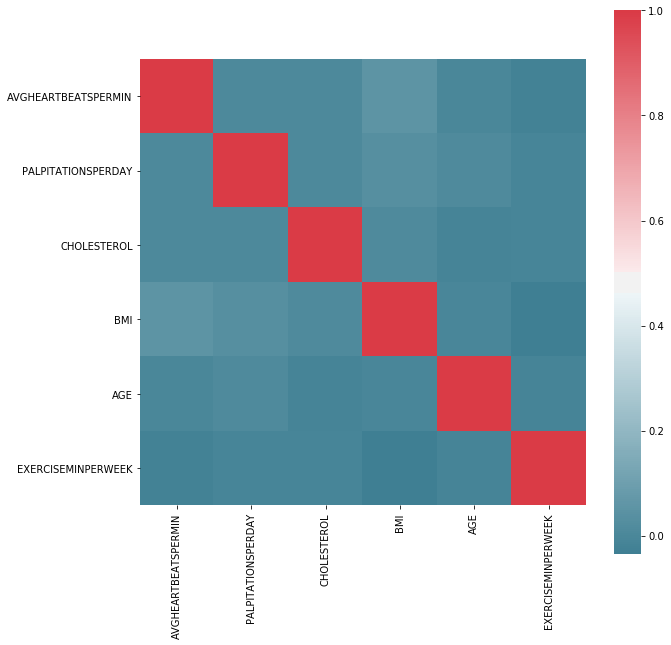

In [13]:
import seaborn as sns

def plot_corr(df,size=10):
    
    f, ax = plt.subplots(figsize=(size, size))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)


    #'''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    #Input:
    #    df: pandas DataFrame
     #   size: vertical and horizontal size of the plot'''

    #corr = df.corr()
    #fig, ax = plt.subplots(figsize=(size, size))
    #ax.matshow(corr)
    #plt.xticks(range(len(corr.columns)), corr.columns);
    #plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(patient_df)

In [14]:
##############################################################################################################################
## We then digitize our data to ensure we can use them in our classifiers 
##############################################################################################################################

In [15]:
patient_df['SEX'] = patient_df['SEX'].apply(lambda x: 0 if x == 'F' else 1)
patient_df['FAMILYHISTORY'] = patient_df['FAMILYHISTORY'].apply(lambda x: 0 if x == 'N' else 1)
patient_df['HEARTFAILURE'] = patient_df['HEARTFAILURE'].apply(lambda x: 0 if x == 'N' else 1)
patient_df['SMOKERLAST5YRS'] = patient_df['SMOKERLAST5YRS'].apply(lambda x: 0 if x == 'N' else 1)#

In [16]:
patient_df[patient_df['HEARTFAILURE']==1].count()

AVGHEARTBEATSPERMIN    1788
PALPITATIONSPERDAY     1788
CHOLESTEROL            1788
BMI                    1788
HEARTFAILURE           1788
AGE                    1788
SEX                    1788
FAMILYHISTORY          1788
SMOKERLAST5YRS         1788
EXERCISEMINPERWEEK     1788
dtype: int64

In [17]:
##############################################################################################################################
## Checking that our digitization work
## given that the other data type are not that big, we decide not to normalize them
##############################################################################################################################

In [18]:
patient_df.head(10)

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,0,0,0,110
1,108,22,181,24,0,32,0,0,0,192
2,86,0,239,20,0,60,0,0,0,121
3,80,36,164,31,1,45,0,1,0,141
4,66,36,185,23,0,39,0,0,0,63
5,125,27,201,31,0,47,1,0,0,13
6,83,27,169,20,0,71,0,1,0,124
7,107,31,199,32,0,55,0,0,0,22
8,92,28,174,22,0,44,0,0,0,107
9,84,12,206,25,0,50,1,0,0,199


In [19]:
##############################################################################################################################
## Let's split our dataset for training and testing purposes
##############################################################################################################################

In [20]:
train, test = train_test_split(patient_df, test_size=0.2, random_state=0)

In [21]:
train.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
7677,112,20,190,27,0,69,0,0,0,7
2327,61,36,226,32,0,37,1,0,0,70
7092,114,31,224,23,1,35,0,1,1,156
635,126,14,170,26,0,40,0,1,0,24
3420,108,6,199,26,0,69,1,0,0,150


In [22]:
test['HEARTFAILURE'].head()

8328    1
1238    0
5124    1
4290    0
6022    0
Name: HEARTFAILURE, dtype: int64

In [23]:
##############################################################################################################################
## We separate the labels (heartfailure) from the data (the rest of the columns) both for the training and testing sets
##############################################################################################################################

In [24]:
X_train = train.drop(['HEARTFAILURE'], axis=1)
y_train = train['HEARTFAILURE']
X_test = test.drop(['HEARTFAILURE'], axis=1)
y_test = test['HEARTFAILURE']

In [25]:
X_train.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
7677,112,20,190,27,69,0,0,0,7
2327,61,36,226,32,37,1,0,0,70
7092,114,31,224,23,35,0,1,1,156
635,126,14,170,26,40,0,1,0,24
3420,108,6,199,26,69,1,0,0,150


In [26]:
##############################################################################################################################
## We then implement our models and their evaluations to make sure we select the best one
##############################################################################################################################

In [28]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost","Naive Bayes", "QDA"]
#"Gaussian Process",
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DTC(max_depth=5),
    RFC(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

max_score = ('', 0)

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    acc_train = acc(y_train_pred, y_train)
    f1score_train = f1_score(y_train_pred, y_train)
    acc_test = acc(y_test_pred, y_test)
    f1score_test = f1_score(y_test_pred, y_test)
    
    score = clf.score(X_test, y_test)
    
    if acc_test > max_score[1]:
        max_score = (name, acc_test)
    
    print("Train set accuracy for {} classifier: {} ".format(name, acc_train))
    print("Train set F1_Score for {} classifier: {} ".format(name, f1score_train))
    print("Test set accuracy for {} classifier: {} ".format(name, acc_test))
    print("Test set F1_Score for {} classifier: {} ".format(name, f1score_test))
    print('#####################################################################\n')

#print("The best classifier for this task has been identified as: \n")
#print(max_score[0])
#print("With an accuracy of the test set of :", max_score[1].round(3))

Train set accuracy for Nearest Neighbors classifier: 0.8743055555555556 
Train set F1_Score for Nearest Neighbors classifier: 0.495353159851301 
Test set accuracy for Nearest Neighbors classifier: 0.825462962962963 
Test set F1_Score for Nearest Neighbors classifier: 0.2504970178926441 
#####################################################################



C:\Users\mehdi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\mehdi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Train set accuracy for Linear SVM classifier: 0.8332175925925925 
Train set F1_Score for Linear SVM classifier: 0.0 
Test set accuracy for Linear SVM classifier: 0.8393518518518519 
Test set F1_Score for Linear SVM classifier: 0.0 
#####################################################################



C:\Users\mehdi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Train set accuracy for RBF SVM classifier: 1.0 
Train set F1_Score for RBF SVM classifier: 1.0 
Test set accuracy for RBF SVM classifier: 0.8393518518518519 
Test set F1_Score for RBF SVM classifier: 0.0 
#####################################################################

Train set accuracy for Decision Tree classifier: 0.8697916666666666 
Train set F1_Score for Decision Tree classifier: 0.4705882352941177 
Test set accuracy for Decision Tree classifier: 0.8833333333333333 
Test set F1_Score for Decision Tree classifier: 0.509727626459144 
#####################################################################

Train set accuracy for Random Forest classifier: 0.8533564814814815 
Train set F1_Score for Random Forest classifier: 0.24896265560165975 
Test set accuracy for Random Forest classifier: 0.8578703703703704 
Test set F1_Score for Random Forest classifier: 0.24197530864197533 
#####################################################################

Train set accuracy for Neural Net

In [29]:
##############################################################################################################################
## We provide the resulting classifier and its metrics accuracy
##############################################################################################################################

In [30]:
print("The best classifier for this task has been identified as: \n")
print(max_score[0])
print("With an accuracy of the test set of :", max_score[1].round(3))

The best classifier for this task has been identified as: 

Decision Tree
With an accuracy of the test set of : 0.883
